In [1]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio import features
from shapely.geometry import shape
from shapely.geometry import Polygon
from shapely.ops import triangulate
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Open the raster file
with rasterio.open("ThuanHoa/KetQua/PNN.tif") as src:
    # Read the raster data as a numpy array
    raster_data = src.read(1)

    # Convert the data type to an acceptable type, e.g., int32
    raster_data = raster_data.astype(np.int32)

    # Define a mask for the areas of interest (e.g., non-ero values)
    mask = raster_data > 0

    # Generate shapes (polygons) from the raster data
    shapes = list(features.shapes(raster_data, mask=mask, transform=src.transform))

    # Convert shapes into geometries (Shapely geometries)
    geoms = [shape(geom) for geom, value in shapes]

    # Create a GeoDataFrame from the geometries
    gdf = gpd.GeoDataFrame(geometry=geoms, crs=src.crs)

    # Save the result as a shapefile or any other vector format
    gdf.to_file("output_vector.shp")

/tmp/ipykernel_1129/948132799.py:7: RuntimeWarning: invalid value encountered in cast
  raster_data = raster_data.astype(np.int32)


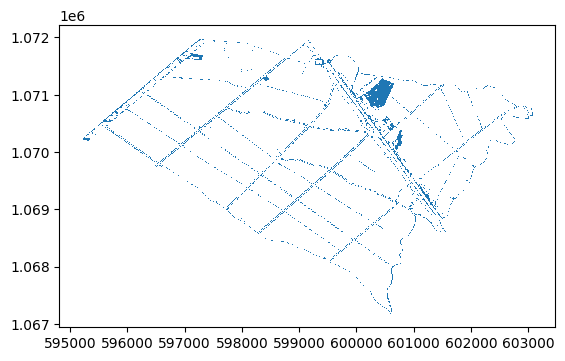

In [3]:
# Load the shapefile
gdf = gpd.read_file("output_vector.shp")

# Plot the data
gdf.plot()

# Show the plot
plt.show()

In [4]:
# Function to partition polygons
def partition_polygon(polygon):
    # Triangulate the polygon into smaller triangles
    triangles = triangulate(polygon)
    return triangles


In [5]:
# Load the shapefile
gdf = gpd.read_file("output_vector.shp")

In [6]:
# Create a new GeoDataFrame to store the partitioned polygons
partitioned_polygons = []

# Loop through each polygon in the GeoDataFrame
for i, row in gdf.iterrows():
    geom = row.geometry
    
    # If the geometry is a polygon (ignoring other geometries like multipolygons for now)
    if isinstance(geom, Polygon):
        # Partition the polygon and extend the list
        partitioned_polygons.extend(partition_polygon(geom))


In [7]:
# Convert the partitioned polygons back into a GeoDataFrame
gdf_partitioned = gpd.GeoDataFrame(geometry=partitioned_polygons, crs=gdf.crs)

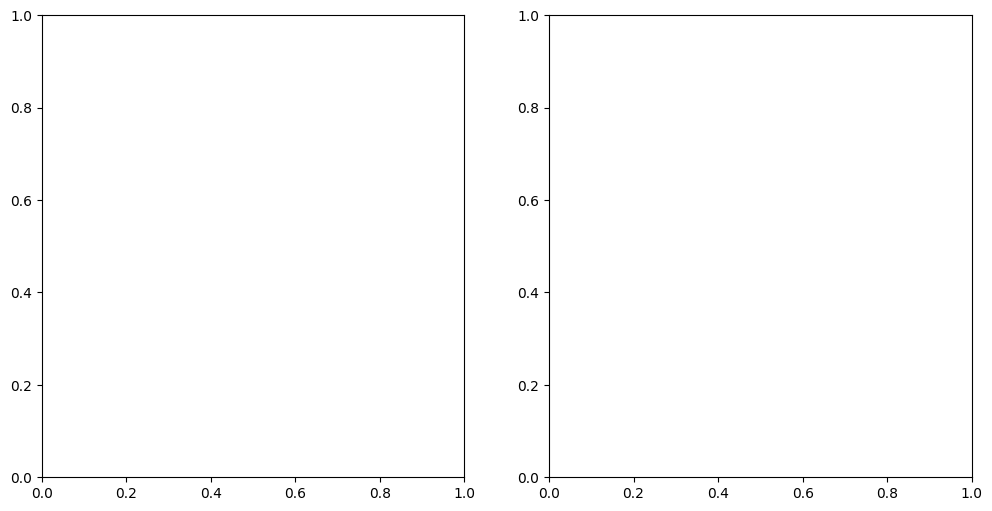

In [9]:
# Plot the original polygons and the partitioned polygons side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

In [10]:
gdf.plot(ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title('Original Polygons')

Text(0.5, 1.0, 'Original Polygons')

<Figure size 640x480 with 0 Axes>

In [11]:
gdf_partitioned.plot(ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Partitioned Polygons')
plt.show()

<Figure size 640x480 with 0 Axes>